# Your info

Full name: Sina Eskandari

Student ID: 97521054

## Loading dataset

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
np.random.seed(1)

In [377]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

In [378]:
X, Y = load_planar_dataset() 
m = Y.shape[1]

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('Number of training examples: ' + str(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Number of training examples: 400


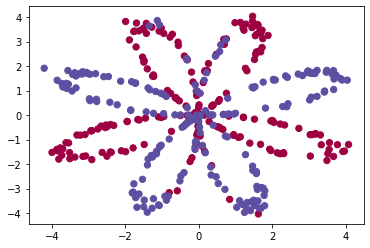

In [379]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## Example for plotting decision boundry

In [380]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [381]:
# Train a simple logistic regression classifier with sklearn
# sklearn takes transpose of X
# sklearn takes ravel of transpose of Y
# The shape of X.T is: (400, 2)
# The shape of np.ravel(Y.T) is: (400,)

model = LogisticRegression()
model.fit(X.T, np.ravel(Y.T))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Decision Boundry')

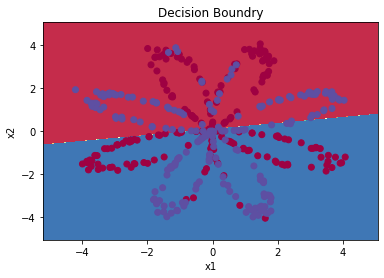

In [382]:
# Plot decision boundry on trained data
# plot_decision_boundary takes a prediction of sklearn model for anonymous input of x
# plot_decision_boundary takes X: (2, 400)
# plot_decision_boundary takes Y: (1, 400)

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Decision Boundry")

# Q1. Perceptron

In [383]:
# Q1_graded
# Do not change the above line.

class Perceptron:
    def __init__(self, lr, epochs, sgd):
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.sgd = sgd


    def activation(self, x):
        # replaces each item in array with its activation function value
        return np.where(x >= 0, 1, 0)

    
    def fit(self, X, Y):
        np.random.seed(1)
        # initializing weights and bias
        self.weights = np.random.random((X.shape[0], 1))
        self.bias = np.zeros((1, 1))
        # stochastic
        if self.sgd:
            for _ in range(self.epochs):
                # calculate predicted and error values
                predicted = self.activation(np.dot(self.weights.T, X))
                error = Y - predicted
                # update weights and bias using delta rule
                for i in range(X.shape[1]):
                    self.weights += (X[:,i].reshape(X.shape[0], 1) * error[0, i]) * self.learning_rate
                    self.bias += error[0, i] * self.learning_rate
        # batch
        else:
            m = X.shape[1]
            for _ in range(self.epochs):
                # calculate predicted and error values
                predicted = self.activation(np.dot(self.weights.T, X))
                error = (1/m) *  np.sum(Y - predicted)
                # update weights and bias using delta rule
                for i in range(m):
                    self.weights += (X[:,i].reshape(X.shape[0], 1) * error) * self.learning_rate
                    self.bias += error * self.learning_rate


    def predict(self, X):
        return self.activation(np.dot(self.weights.T, X.T))

In [384]:
# Q1_graded
# Do not change the above line.

learning_rate = 0.01
epochs = 100
sgd = True
model = Perceptron(learning_rate, epochs, sgd)
model.fit(X, Y)

Text(0.5, 1.0, 'Decision Boundry')

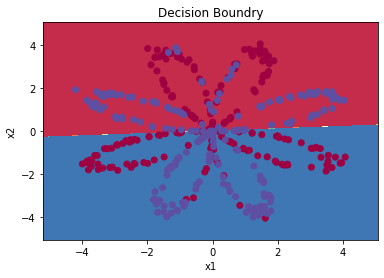

In [385]:
# Q1_graded
# Do not change the above line.

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Decision Boundry")

# Q2. MLP

In [386]:
# Q2_graded
# Do not change the above line.

# Remove this comment and type your codes here
class MLP:
    def __init__(self, lr, epochs, layerdims):
        np.random.seed(1)
        self.learning_rate = lr
        self.epochs = epochs
        # init params
        self.w = [] # weights
        n = len(layerdims)
        for i in range(n - 1):
            self.w.append(np.random.random((layerdims[i], layerdims[i + 1])))
        
        self.b = [] # bias
        for i in range(1, n):
            self.b.append(np.random.random(layerdims[i]))

        self.a = [] # each layer output
        for i in range(n):
            self.a.append(np.zeros(layerdims[i]))
        
        self.d = [] # each layer delta
        for i in range(1, n):
            self.d.append(np.zeros(layerdims[i]))

        self.activation_funcs = [] # each layer activation function
        self.derivative_funcs = [] # each layer derivative of activation function

        for i in range(1, n - 1):
            self.activation_funcs.append('relu')
            self.derivative_funcs.append('relu_der')
        
        self.activation_funcs.append('sigmoid')
        self.derivative_funcs.append('sigmoid_der')

    def fit(self, X, Y):
        n = len(self.w) + 1
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                target = Y[i,:]
                self.a[0] = X[i, :]
                # feed forward
                for j in range(n - 1):
                    self.a[j + 1] = self.linear_forward_activation(self.a[j], self.w[j], self.b[j], self.activation_funcs[j])
                # calculate last layer delta value
                self.d[-1] = np.multiply((target - self.a[-1]), self.linear_activation_backward(self.a[-1], self.derivative_funcs[-1]))

                # calculate hidden layers delta values
                for j in range(n - 2, 0, -1):
                    self.d[j - 1] = np.multiply(self.d[j].dot(self.w[j].T), self.linear_activation_backward(self.a[j], self.derivative_funcs[j]))
                # update parameters using delta rule
                for j in range(n - 1):
                    self.w[j] = self.w[j] + self.learning_rate * np.outer(self.a[j], self.d[j])
                    self.b[j] = self.b[j] + self.learning_rate * self.d[j]

    def predict(self, X):
        n = len(self.w) + 1
        A = X.T
        for j in range(n - 1):
            A_prev = A
            A = self.linear_forward_activation(A_prev, self.w[j], self.b[j].reshape(-1, 1), self.activation_funcs[j])
        return np.where(A >= 0.5, 1, 0)

    def linear_forward(self, X, W, B):
        Z = W.T.dot(X) + B
        return Z

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def sigmoid_der(self, X):
        Z = self.sigmoid(X)
        return Z * (1 - Z)

    def relu(self, X):
        A = np.maximum(0, X)
        return A

    def relu_der(self, X):
        X[X <= 0] = 0
        X[X > 0] = 1
        return X

    def linear_forward_activation(self, A_prev, W, b, activation):
        Z = self.linear_forward(A_prev, W, b)
        if activation == 'sigmoid':
            return self.sigmoid(Z)
        elif activation == 'relu':
            return self.relu(Z)

    def linear_activation_backward(self, X, activation):
        dZ = None
        if activation == "relu_der":
            dZ = self.relu_der(X)
            
        elif activation == "sigmoid_der":
            dZ = self.sigmoid_der(X)
        
        return dZ    


In [387]:
# Q2_graded
# Do not change the above line.
learning_rate = 0.001
epochs = 100
# first item is number of features and last layer is number of output neurons
layerdims = [2, 2, 1]
model = MLP(learning_rate, epochs, layerdims)
model.fit(X.T, Y.T)

Text(0.5, 1.0, 'Decision Boundry')

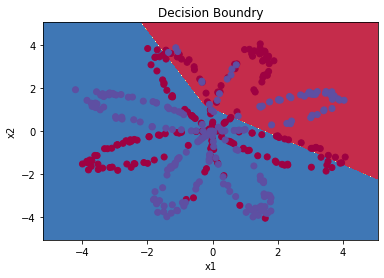

In [388]:
# Q2_graded
# Do not change the above line.

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Decision Boundry")

# Q3. Keras

In [389]:
# Q3_graded
# Do not change the above line.

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

In [390]:
# Q3_graded
# Do not change the above line.
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.fashion_mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)
image_size = x_train_1.shape[1]
# converting image array from 3d to 2d
x_train_1 = np.reshape(x_train_1, [-1, image_size*image_size])
x_test_1 = np.reshape(x_test_1, [-1, image_size*image_size])
# normalizing image array
x_train_1 = x_train_1 / 255
x_test_1 = x_test_1 / 255

In [391]:
# Q3_graded
# Do not change the above line.

# initalizing model and add layers
model = Sequential()
model.add(layers.Input(shape=(image_size, image_size)))
model.add(layers.Flatten())
# model.add(layers.Dense(128))
# model.add(layers.Activation('relu'))
model.add(layers.Dense(units=128, kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [392]:
# Q3_graded
# Do not change the above line.

# initializing gradient descent optimizer
sgd_optimizer = SGD(
    learning_rate=0.01,
    momentum=0,
)

loss = 'categorical_crossentropy'

In [393]:
# Q3_graded
# Do not change the above line.

# adding optimizer and loss function to model
model.compile(
    loss=loss,
    optimizer=sgd_optimizer,
    metrics=['accuracy'],
)

In [394]:
# Q3_graded
# Do not change the above line.

# training the model
history = model.fit(
            x=x_train_1,
            y=y_train_1,
            batch_size=64,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 2.8672 - accuracy: 0.7058 - val_loss: 2.3653 - val_accuracy: 0.7778
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 2.0960 - accuracy: 0.7966 - val_loss: 1.8599 - val_accuracy: 0.8088
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.6778 - accuracy: 0.8179 - val_loss: 1.5134 - val_accuracy: 0.8220
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 1.3816 - accuracy: 0.8266 - val_loss: 1.2664 - val_accuracy: 0.8236
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 1.1646 - accuracy: 0.8315 - val_loss: 1.0779 - val_accuracy: 0.8288
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 1.0033 - accuracy: 0.8360 - val_loss: 0.9393 - val_accuracy: 0.8353
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.8836 - accuracy: 0.8389 - val_loss: 0.8456 - val_accuracy: 0.8331
Epoch 

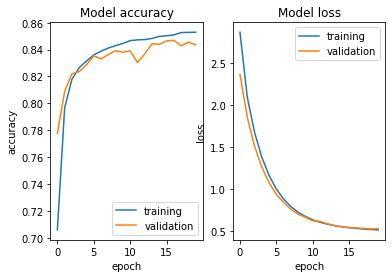

In [395]:
# Q3_graded
# Do not change the above line.
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

In [396]:
# Q3_graded
# Do not change the above line.
model.evaluate(
    x=x_test_1,
    y=y_test_1,
    batch_size=64,
)

157/157 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.8329


[0.5563768148422241, 0.8328999876976013]

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI001_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.